In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**DATASETS**

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


# Churn

In [6]:
%cd '/content/drive/MyDrive/Curso Data Science'
df= pd.read_csv('churn.csv')

/content/drive/MyDrive/Curso Data Science


**Objetivo:** Predecir la perdida de clientes en un banco

**Acceso a dataset:**
https://drive.google.com/file/d/1yYxBgQwT4X_OxEwP_glxMikfazQ_Mi6S/view?usp=sharing

Principales Variables:

*  CustomerId: Numero de identificacion de los clientes
*CreditScore: Puede tener un efecto en la rotación de clientes, ya que es menos probable que un cliente con un puntaje de crédito más alto abandone el banco
*   Gender: Es interesante explorar si el género juega un papel en que un cliente abandone el banco
*Age: Importante porque es menos probable que los clientes mayores abandonen su banco que los más jóvenes
*Tenure: se refiere al número de años que el cliente ha sido cliente del banco. Normalmente, los clientes mayores son más leales y menos propensos a dejar un banco
*Exited: Si el cliente dejó el banco o no

In [7]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [32]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Contexto comercial**

El banco tiene una base de datos de clientes, en la misma hay clientes que siguen perteneciendo al banco y clientes que ya no continuan. El objetivo es identificar patrones entre los mismos que ayuden a predecir la potencial perdida de algun cliente para poder tomar acciones preventivas

**Contexto Analitico**

Se cuenta con una base de clientes con un codigo identificador y datos personales como edad, genero, apellido y pais y datos bancarios/financieros como puntaje crediticio, balance en la cuenta, salario estimado, cantidad de productos, si posee tarjeta de credito y antiguedad en el banco. Además para cada uno se menciona si sigue siendo cliente del banco o no

**Problema Comercial - Planteo de hipotesis**

Se han plantean las siguientes hipotesis:

*   El genero del cliente esta relacionado con la perdida del mismo?
*El puntaje crediticio esta relacionado directamente con la perdida de los clientes?
*El salario del cliente nos puede dar indicios de si el cliente es más propensa a irse del banco?
*La edad de los clientes es un factor a tener en cuenta a la hora de tratar de predecir si el cliente se puede ir del banco?
*El balance en la cuenta del banco del cliente nos puede dar indicios de si el cliente es más propensa a irse del banco?

**Eliminar duplicados**

In [9]:
df = df.drop_duplicates(subset=['CustomerId'], keep='first') # se considero que si el titulo se repite, el articulo esta duplicado
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


No hay duplicados

**Manejo de nulos**

In [10]:
import missingno as msno

In [11]:
df.isnull().sum() #veo las columnas que tengan nulos

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No hay valores nulos en las distintas columnas por lo que no es necesario hacer una limpieza

**Outliers**

<Axes: ylabel='EstimatedSalary'>

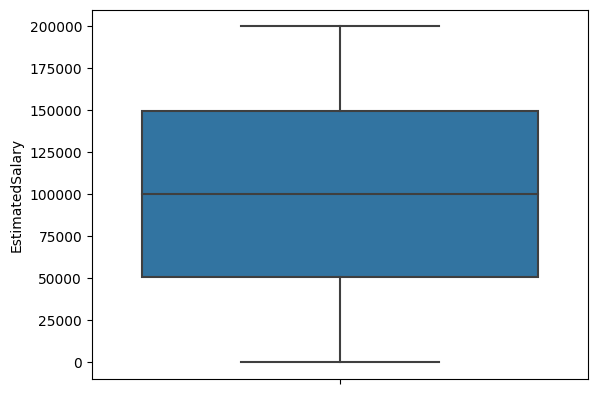

In [12]:
sns.boxplot(data=df, y='EstimatedSalary')

<Axes: ylabel='Balance'>

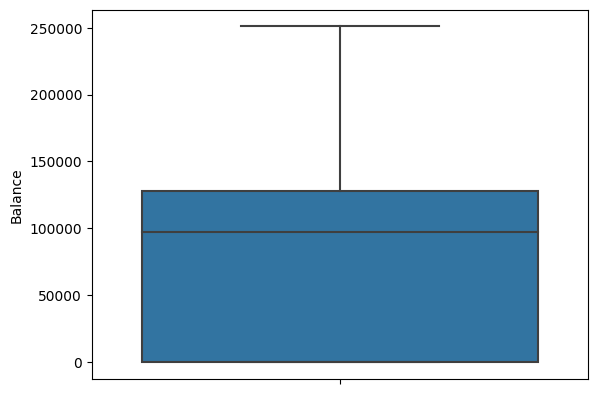

In [13]:
sns.boxplot(data=df, y='Balance')

No se observan outliers en balance o en salario estimado

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

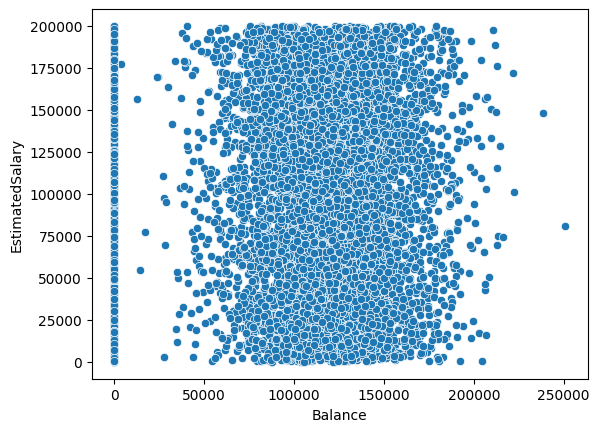

In [14]:
sns.scatterplot(data = df, x='Balance', y='EstimatedSalary')

No se observan outliers evidentes en la variable Estimated Salary, para el Balance se observan outliers en los valores más altos

**Analisis univariado**

In [15]:
df['Balance'].quantile(0.99)

185967.98540000003

Se realizo un analisis de la variable balance para retirar los valores del extremo superior (1%)

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

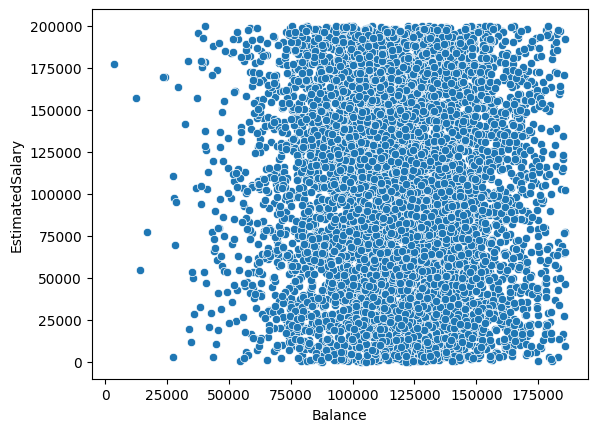

In [16]:
nuevo_df = df[(df['Balance']>df['Balance'].quantile(0.01)) & (df['Balance']<df['Balance'].quantile(0.99))]
sns.scatterplot(data = nuevo_df, x='Balance', y='EstimatedSalary')

Calculo de media, desvio standard, minimos y maximos de principales variables

In [17]:
nuevo_df.mean().round(2)

<ipython-input-17-6d20eb0c7999>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  nuevo_df.mean().round(2)


RowNumber              4980.70
CustomerId         15690425.52
CreditScore             651.12
Age                      39.21
Tenure                    4.98
Balance              118589.91
NumOfProducts             1.39
HasCrCard                 0.70
IsActiveMember            0.51
EstimatedSalary      100632.01
Exited                    0.24
dtype: float64

In [18]:
nuevo_df.min()

RowNumber                 2
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure                    0
Balance             3768.69
NumOfProducts             1
HasCrCard                 0
IsActiveMember            0
EstimatedSalary       11.58
Exited                    0
dtype: object

In [19]:
nuevo_df.max()

RowNumber              10000
CustomerId          15815690
Surname               Zuyeva
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            185966.64
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199970.74
Exited                     1
dtype: object

In [20]:
np.std(nuevo_df)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


RowNumber           2893.228192
CustomerId         71870.696331
CreditScore           96.968772
Age                   10.474385
Tenure                 2.909581
Balance            28639.012441
NumOfProducts          0.577141
HasCrCard              0.458265
IsActiveMember         0.499815
EstimatedSalary    57434.928491
Exited                 0.426313
dtype: float64

**Analisis Bivariado**

Tipos de variables:

* Credit Score: Numerica
* Age: Numerica
*Tenure: Numerica
*Balance: Numerica
*Number of Products: Numerica
*Has credit card: Binaria
*Is active member: Binaria
*Estimated Salary: Numerica
*Exited: Target(Binaria)





Usaremos Biserial Correlation para ver la correlacion entre las variables numericas y la target y la de Mathews para las binarias

In [21]:
from sklearn.metrics import matthews_corrcoef
from scipy import stats

In [22]:
x = nuevo_df['Exited']
y = nuevo_df['HasCrCard']
matthews_corrcoef(x,y)

1.9449666068002158e-05

In [23]:
x = nuevo_df['Exited']
y = nuevo_df['IsActiveMember']
matthews_corrcoef(x,y)

-0.17360172955820022

En ambos casos la correlacion es cercana a 0 por lo que las variables tienen baja correlacion

In [24]:
x = nuevo_df['Exited']
y = nuevo_df['CreditScore']
stats.pointbiserialr(x,y)

SignificanceResult(statistic=-0.03347546367312595, pvalue=0.007962378017500063)

In [25]:
x = nuevo_df['Exited']
y = nuevo_df['Age']
stats.pointbiserialr(x,y)

SignificanceResult(statistic=0.30326217266794775, pvalue=8.652982818915335e-134)

In [26]:
x = nuevo_df['Exited']
y = nuevo_df['Tenure']
stats.pointbiserialr(x,y)

SignificanceResult(statistic=-0.0030616030847416802, pvalue=0.8082909494696479)

In [27]:
x = nuevo_df['Exited']
y = nuevo_df['Balance']
stats.pointbiserialr(x,y)

SignificanceResult(statistic=0.003155460396052176, pvalue=0.8025335132968511)

In [28]:
x = nuevo_df['Exited']
y = nuevo_df['EstimatedSalary']
stats.pointbiserialr(x,y)

SignificanceResult(statistic=0.005804411468229307, pvalue=0.6455153624938362)

La unica variable que muestra una correlacion significativa es la edad, pero el pvalue es muy alto por lo que no seria significante

**Análisis mediante gráficos**

<Axes: xlabel='CreditScore', ylabel='Proportion'>

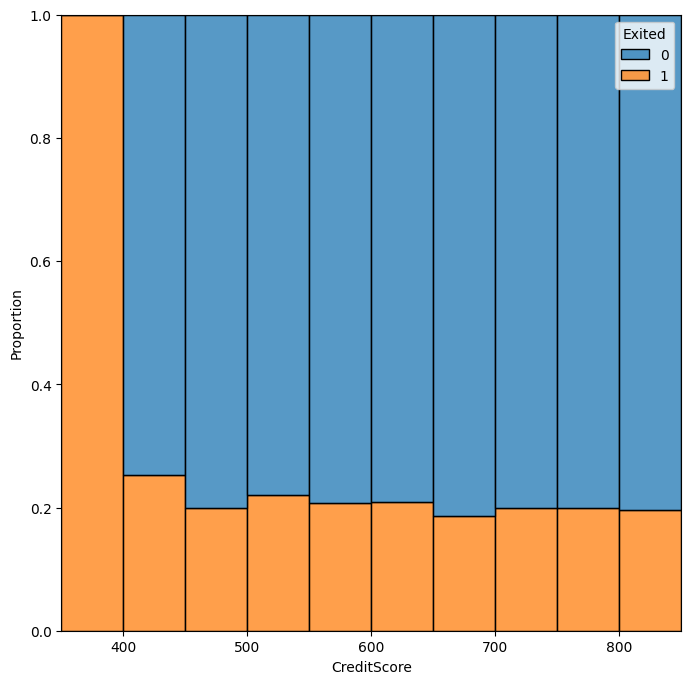

In [29]:
fig,ax=plt.subplots(1,1, figsize=(8,8))
sns.histplot(data=df, x="CreditScore", hue="Exited", multiple="fill", stat="proportion", bins=10)

Para el caso del credit score se observa que el primer grupo con un credit score menor a los 400 puntos tiene un exit del 100% de los casos. A partir de los 400 puntos se observa una muy leve caida del % de exit de los clientes a medida que mejora el credit score

In [52]:
df['Age'].max()

92

In [57]:
df['Age'].min()

18

In [55]:
rango_edad = [10,20,30,40,50,60,70,80,90,100]
vector_edad = np.array(rango_edad)
vector_edad

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

<Axes: xlabel='Age', ylabel='Proportion'>

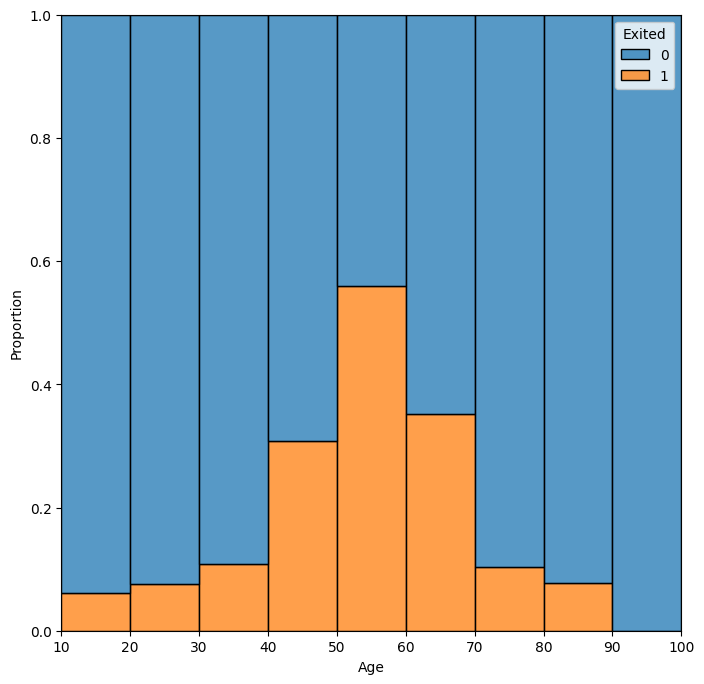

In [56]:
fig,ax=plt.subplots(1,1, figsize=(8,8))
sns.histplot(data=df, x="Age", hue="Exited", multiple="fill", stat="proportion", bins=vector_edad)

Se observa que los grupos de edad media(45 a 65) son los grupos con mayor porcentaje de exit. Mientras que los grupos jovenes tienen un % de exit mucho menor frente a valores casi nulos de los grupos mayores a 75 años. Para futuros analisis se recomienda agrupar las edades en decadas redondas para poder explicar mejor el analisis

<Axes: xlabel='Balance', ylabel='Proportion'>

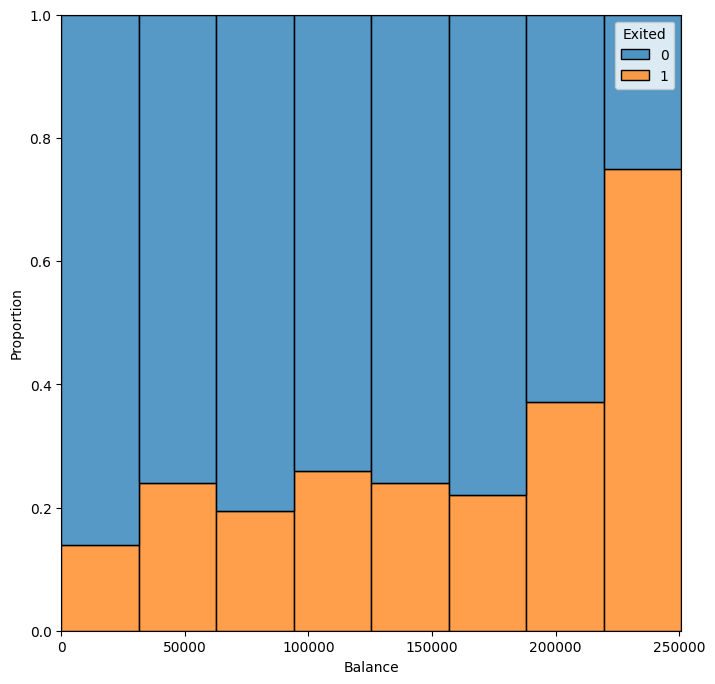

In [31]:
fig,ax=plt.subplots(1,1, figsize=(8,8))
sns.histplot(data=df, x="Balance", hue="Exited", multiple="fill", stat="proportion",bins=8)

A pesar de lo que se esperaba inicialmente, se obsera que los clientes que tienen un balance mayor en sus cuentas tienden a dejar de ser clientes más habitualmente, mientras que los clientes con menor balance tienen un % de exit menor

<Axes: xlabel='Gender', ylabel='Proportion'>

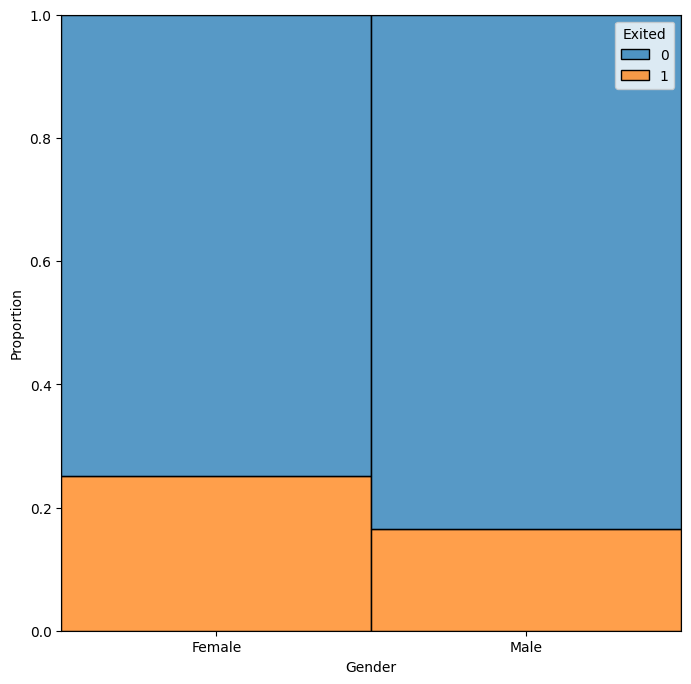

In [35]:
fig,ax=plt.subplots(1,1, figsize=(8,8))
sns.histplot(data=df, x="Gender", hue="Exited", multiple="fill", stat="proportion", bins=2)

Se observa un mayor porcentaje de perdida de clientes para el genero femenino

<Axes: xlabel='EstimatedSalary', ylabel='Proportion'>

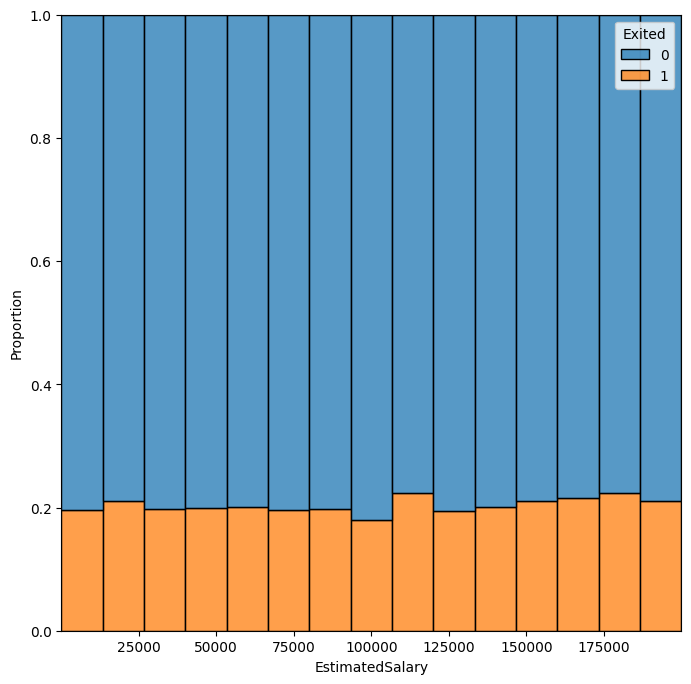

In [37]:
fig,ax=plt.subplots(1,1, figsize=(8,8))
sns.histplot(data=df, x="EstimatedSalary", hue="Exited", multiple="fill", stat="proportion", bins=15)

No se observa una relación entre la perdida de clientes y el salario estimado

**Importar datos de APIs**

No se encontro APIs publicas que complementen el dataset original

**Recomendaciones**

*   Se recomienda que se realicen acciones con respecto a los clientes que tengan un puntaje crediticio menor a 400 ya que, para los casos analizados, se obsera una perdida del 100% de los mismos. Las acciones dependeran del beneficio que se obtenga con este tipo de clientes, en el caso de que haya un beneficio bajo o nulo se recomienda no incorporar nuveos clientes al banco con este puntaje crediticio. En el caso de que se obtenga un beneficio con estos clientes, se recomienda que se les ofrezcan productos de más bajo costo para que no tengan complicaciones a la hora de adquirirlos
*Al obserarse que muchos clientes de salarios más altos dejan de ser clientes, se recomienda que a estas personas se les ofrezcan paquetes premium con mayores beneficios en productos o sericios de más alto nivel